In [1]:
import networkx as nx

In [2]:
graph = nx.DiGraph()

In [3]:
from sympy import symbols, Symbol, pi
from sympy import Eq
v_perp_s, v_para_s = Symbol("v_{\perp, s}"), Symbol("v_{\parallel, s}")
v_perp_e, v_para_e = Symbol("v_{\perp, e}"), Symbol("v_{\parallel, e}")
v_perp_p, v_para_p = Symbol("v_{\perp, p}"), Symbol("v_{\parallel, p}")
v_perp_D, v_para_D = Symbol("v_{\perp, D}"), Symbol("v_{\parallel, D}")
v_perp_T, v_para_T = Symbol("v_{\perp, T}"), Symbol("v_{\parallel, T}")
m_s, Z_s = symbols("m_{s}, Z_{s}")
m_s1, Z_s1 = symbols("m_{s1}, Z_{s1}")
m_s2, Z_s2 = symbols("m_{s2}, Z_{s2}")
r_s1_s2 = Symbol("r_{s1,s2}")
m_e, Z_e = symbols("m_{e}, Z_{e}")
m_p, Z_p = symbols("m_{p}, Z_{p}")
m_D, Z_D = symbols("m_{D}, Z_{D}")
m_T, Z_T = symbols("m_{T}, Z_{T}")
F_Coulomb, B_ext = symbols("F_{Coulomb}, B_{ext}")
e = Symbol("e")
vacuum_epsilon, vacuum_mu = symbols("\\varepsilon_{0}, \mu_{0}")

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
%matplotlib inline

In [5]:
Z_sum = Symbol("Z_{sum}")

In [6]:
from hifor.graphtool import add_nodes_and_edges_from_Eq
add_nodes_and_edges_from_Eq(
    graph, 
    Eq(F_Coulomb, 1/(4*pi*vacuum_epsilon) * (Z_s1 * Z_s2 * e**2 ) / r_s1_s2**2 )) 

In [7]:
add_nodes_and_edges_from_Eq(
    graph, 
    Eq(Z_sum, Z_s1+Z_s2)) 

In [8]:
nx.is_directed_acyclic_graph(graph)

True

In [9]:
from hifor.height import find_heights_of_all_nodes     
find_heights_of_all_nodes(graph)

In [10]:
graph.nodes[Z_s1]

{'height': 0}

In [46]:
from decimal import Decimal, getcontext
from scipy import constants
graph.graph["decimal_context"] = getcontext()
graph.nodes[e]["val"] = Decimal( constants.value(u'elementary charge'), graph.graph["decimal_context"])
# graph.nodes[B]["val"] = Decimal( constants.value(u'elementary charge'), graph.graph["decimal_context"])

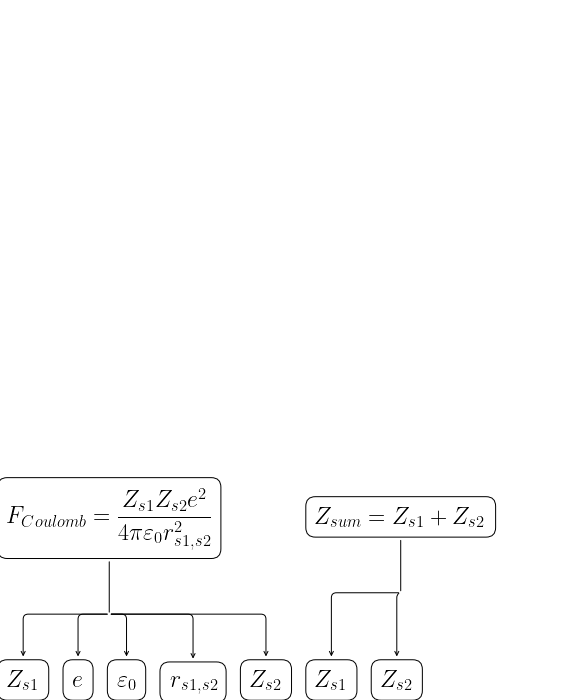

In [11]:
from hifor.draw import draw_formula_hierarchy

yxratio = 15.0/12
figsize_datalim_ratio = 2.0
data_xmax = 5
xlim = [0, data_xmax]
ylim = [0, data_xmax*yxratio]

fig, ax = plt.subplots(1,1, figsize=(
    data_xmax * figsize_datalim_ratio, 
    data_xmax * yxratio * figsize_datalim_ratio) )
ax.set_axis_off()
ax.set_xlim([0, data_xmax]); ax.set_ylim([0, data_xmax * yxratio])


draw_formula_hierarchy(graph, fig, ax)
fig.savefig("test.png", dpi=600, bbox_inches=0) # bbox_inches=0 from Hooked, StackOverflow, https://stackoverflow.com/a/9295472/12486177

In [35]:
# In Python, float data type is of range 2.22507e-308 to 1.79769e+308 and 64 bits, equivalent to double in other languages.
from scipy import constants
constants.value(u'proton mass')

1.67262192369e-27